<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [9]</a>'.</span>

# STEP : Rarefaction Analysis

Using QIIME2 to create rarefaction graphs.


## Methods
[qiime alpha_rarefaction](https://docs.qiime2.org/2023.2/plugins/available/diversity/alpha-rarefaction/)
```
Generate interactive alpha rarefaction curves by computing rarefactions
between `min_depth` and `max_depth`. The number of intermediate depths to
compute is controlled by the `steps` parameter, with n `iterations` being
computed at each rarefaction depth. If sample metadata is provided, samples
may be grouped based on distinct values within a metadata column.
```


## Setup and settings

In [1]:
# Importing packages
import os
import pandas as pd
from qiime2 import Artifact
from qiime2 import Visualization
from qiime2 import Metadata
from qiime2.plugins.diversity.visualizers import alpha_rarefaction
from qiime2.plugins.diversity.visualizers import beta_rarefaction

from qiime2.plugins.feature_table.methods import filter_samples
from qiime2.plugins.feature_table.methods import filter_seqs

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# from qiime2.plugins import demux, deblur, quality_filter, \
#                            metadata, feature_table, alignment, \
#                            phylogeny, diversity, emperor, feature_classifier, \
#                            taxa, composition

### Receiving the parameters

The following cell can receive parameters using the [papermill](https://papermill.readthedocs.io/en/latest/) tool.

In [3]:
metadata_file = '/home/lauro/nupeb/rede-micro/redemicro-miliane-nutri/data/raw/metadata/miliane-metadata-CxAC.tsv'
base_dir = os.path.join('/', 'home', 'lauro', 'nupeb', 'rede-micro', 'redemicro-miliane-nutri')
experiment_name = 'miliane-CxAC-trim'
replace_files = False

In [4]:
# Parameters
base_dir = "/mnt/nupeb/rede-micro/redemicro-ana-flavia-nutri"
class_col = "group-id"
classifier_file = "/mnt/nupeb/rede-micro/datasets/16S_classifiers_qiime2/silva-138-99-nb-classifier.qza"
experiment_name = "ana-flavia-HSD-NCxHSD-NR"
manifest_file = "/mnt/nupeb/rede-micro/redemicro-ana-flavia-nutri/data/raw/manifest/manifest-ana-flavia-HSD-NCxHSD-NR.csv"
metadata_file = "/mnt/nupeb/rede-micro/redemicro-ana-flavia-nutri/data/raw/metadata/metadata-ana-flavia-HSD-NCxHSD-NR.tsv"
overlap = 12
phred = 20
replace_files = False
threads = 6
top_n = 20
trim = {
    "forward_primer": "CCTACGGGRSGCAGCAG",
    "overlap": 8,
    "reverse_primer": "GGACTACHVGGGTWTCTAAT",
}
trunc_f = 0
trunc_r = 0


### Defining names, paths and flags

In [5]:
# Experiments
experiment_folder = os.path.abspath(os.path.join(base_dir, 'experiments', experiment_name))
!mkdir -p {experiment_folder}

# Imgs folder
img_folder = os.path.abspath(os.path.join(experiment_folder, 'imgs'))
!mkdir -p {img_folder}

# QIIME2 Artifacts folder
qiime_folder = os.path.join(experiment_folder, 'qiime-artifacts')
!mkdir -p {qiime_folder}

In [6]:
# Input - DADA2 Artifacts
dada2_tabs_path = os.path.join(qiime_folder, 'dada2-tabs.qza')
dada2_reps_path = os.path.join(qiime_folder, 'dada2-reps.qza')
dada2_stat_path = os.path.join(qiime_folder, 'dada2-stat.qza')

# Output -Rarefaction Artifacts
alpha_rarefaction_path = os.path.join(qiime_folder, 'alpha-rarefaction.qza')
alpha_rarefaction_view_path = os.path.join(qiime_folder, 'alpha-rarefaction.qzv')

# Flag - Load or create files
need_tax = not (os.path.isfile(alpha_rarefaction_path)) or replace_files
need_view = not (os.path.isfile(alpha_rarefaction_view_path)) or replace_files

## Step execution

### Load input files

This Step import the QIIME2 `SampleData[PairedEndSequencesWithQuality]` Artifact with all demultiplexed sequences and the `Metadata` file.

In [7]:
#Load Metadata
metadata_qa = Metadata.load(metadata_file)

In [8]:
alt_tab_path = os.path.join(base_dir, 'data', 'interim', 'dada2-tabs.qza')
# Verify if table file exists and if it is shared
if not os.path.isfile(dada2_tabs_path) and os.path.isfile(alt_tab_path):
    # If it is shared, create a local symbolic link
    os.symlink(alt_tab_path, dada2_tabs_path)

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [9]:
# Load Table artifact
tabs = Artifact.load(dada2_tabs_path)
# Filter samples using Metadata IDs
tabs = filter_samples(
    table=tabs,
    metadata=metadata_qa,
).filtered_table
tabs_df = tabs.view(Metadata).to_dataframe().T

## Alpha Rarefaction

In [10]:
# Get min and maximum feature counts to set sampling depth
rank_df = tabs_df.sum().sort_values()
min_feature_count = int(rank_df.min())
max_feature_count = int(rank_df.max())

In [11]:
# Add new columns with samples IDs to rarefaction
meta_df = metadata_qa.to_dataframe()
meta_df['samples'] = meta_df.index.to_list()
metadata_qa = Metadata(meta_df)

In [12]:
alpha_rar = alpha_rarefaction(
    table = tabs,
    max_depth = max_feature_count,
    min_depth = 1,
    metadata = metadata_qa,
)

/home/lauro/anaconda3/envs/qiime2-2023.5/lib/python3.8/site-packages/q2_diversity/_alpha/_visualizer.py:245: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_ = grouped.median()
/home/lauro/anaconda3/envs/qiime2-2023.5/lib/python3.8/site-packages/q2_diversity/_alpha/_visualizer.py:245: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_ = grouped.median()
/home/lauro/anaconda3/envs/qiime2-2023.5/lib/python3.8/site-packages/q2_diversity/_alpha/_visualizer.py:245: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default

In [13]:
alpha_rar.visualization.save(alpha_rarefaction_view_path)
alpha_rar.visualization

<visualization: Visualization uuid: 8ba74da6-6023-4065-a5e4-da726a550041>

## Beta Rarefaction

/home/lauro/anaconda3/envs/qiime2-2023.5/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0007903734822691682 and the largest is 1.5236885512276328.
  warn(
/home/lauro/anaconda3/envs/qiime2-2023.5/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for m

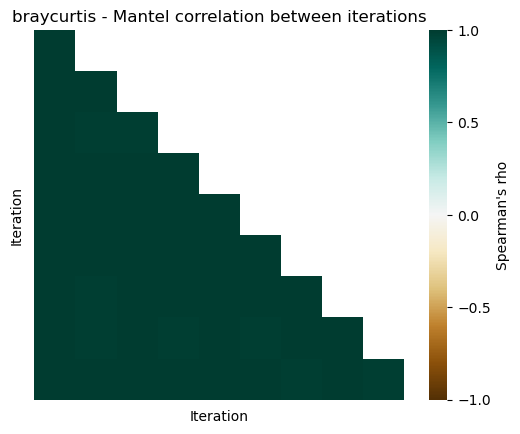

In [14]:
choices = ('matching', 'aitchison', 'euclidean', 'generalized_unifrac', 'canberra', 'russellrao', 'braycurtis', 'cosine', 'jensenshannon', 'yule', 'weighted_normalized_unifrac', 'unweighted_unifrac', 'hamming', 'weighted_unifrac', 'cityblock', 'sokalmichener', 'seuclidean', 'rogerstanimoto', 'correlation', 'minkowski', 'kulsinski', 'chebyshev', 'sqeuclidean', 'sokalsneath', 'jaccard', 'dice', 'canberra_adkins')
clustering_methods = ('nj', 'upgma')
correlation_methods = ('pearson', 'spearman')

sampling_depth = max(min_feature_count, 1)
metric = 'braycurtis'
clustering_method = clustering_methods[0]
correlation_method = correlation_methods[1]

beta_rar = beta_rarefaction(
    table = tabs,
    sampling_depth  = sampling_depth,
    metadata = metadata_qa,
    metric = metric,
    clustering_method = clustering_method,
    correlation_method = correlation_method,
)

 ## Beta diversity PCoA
 Ellipses represent 95% confidence intervals.

In [15]:
plot_tmp = f'{metric}-{clustering_method}-{correlation_method}-{sampling_depth}'
beta_rarefaction_view_path = os.path.join(qiime_folder, f'beta-rarefaction-{plot_tmp}.qzv')
beta_rar.visualization.save(beta_rarefaction_view_path)

beta_rar.visualization

<visualization: Visualization uuid: 46844dd5-1d52-4fce-bbb7-009ff9c974ea>